In [1]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('PorCorreo.xlsx')

In [3]:
df.head(3)

,Unnamed: 0,EMAIL,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD
0,0,00-MAZA.ESQUISTOSO@ICLOUD.COM,4,953.664978,3814.659912,6.25,2.5,0.75,189,1,0,0,0,0,0,0,0,1,0
1,1,000047787@LAMAR.ORG.MX,1,609.909973,609.909973,0.00,16.0,0.00,52,0,1,0,0,1,0,0,0,0,0
2,2,0019122@UP.EDU.MX,1,1047.410034,1047.410034,5.00,5.0,0.00,347,0,1,0,0,0,0,0,0,1,0


In [4]:
n=2
if n==1:
    df=df[df['Primer_Compra']==0]
    #df.drop(columns=df.columns[6:-1], axis=1, inplace=True)
    df.drop(columns='Primer_Compra', axis=1, inplace=True)
elif n==2:
    df=df[df['SBol_Vend']==1]

df

,Unnamed: 0,EMAIL,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD
1,1,000047787@LAMAR.ORG.MX,1,609.909973,609.909973,0.0,16.0,0.0,52,0,1,0,0,1,0,0,0,0,0
2,2,0019122@UP.EDU.MX,1,1047.410034,1047.410034,5.0,5.0,0.0,347,0,1,0,0,0,0,0,0,1,0
4,4,007ITZAMNA@GMAIL.COM,1,907.760010,907.760010,10.0,4.0,0.0,893,0,1,0,0,0,0,0,0,1,0
5,5,01-CAPITAL-WISPS@ICLOUD.COM,1,1086.209961,1086.209961,5.0,1.0,0.0,247,0,1,0,0,0,0,0,0,1,0
6,6,01HECTORELIAS@GMAIL.COM,1,489.220001,489.220001,0.0,3.0,0.0,966,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137138,137138,ángel.álvarez.rodríguez@ejemplo.com,1,1142.500000,1142.500000,5.0,1.0,0.0,34,1,0,0,0,0,0,0,0,1,0
137139,137139,édgar.nava@ejemplo.com,1,985.340027,985.340027,10.0,15.0,1.0,685,1,0,0,0,0,0,0,0,1,0
137140,137140,óscar.adrián.fonseca.ramirez@ejemplo.com,1,754.309998,754.309998,0.0,55.0,1.0,797,1,0,1,0,0,0,0,0,0,0
137141,137141,óscar.alejandro.romero@ejemplo.com,1,1134.310059,1134.310059,5.0,4.0,1.0,102,1,0,0,0,0,0,0,0,1,0


In [5]:
df=df[df.columns[1:]]
X = df[df.columns[1:]]

X.head()

,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD
1,1,609.909973,609.909973,0.0,16.0,0.0,52,0,1,0,0,1,0,0,0,0,0
2,1,1047.410034,1047.410034,5.0,5.0,0.0,347,0,1,0,0,0,0,0,0,1,0
4,1,907.760010,907.760010,10.0,4.0,0.0,893,0,1,0,0,0,0,0,0,1,0
5,1,1086.209961,1086.209961,5.0,1.0,0.0,247,0,1,0,0,0,0,0,0,1,0
6,1,489.220001,489.220001,0.0,3.0,0.0,966,0,1,0,0,0,0,0,0,0,1


In [6]:
m=1
if m==0:# genera 7 clusters para una unica compra, y 7 para multiples compras
    # 1. Crea una instancia del escalador estándar
    scaler = StandardScaler()
    
    # 2. Aplica el ajuste y la transformación
    X_escalado = scaler.fit_transform(X)
    figname='2d_pca_clustersKmeansSS.png'
elif m==1: # genera dos clusters para una unica compra y 2 para multiples compras
    # 1. Crea una instancia del escalador robusto
    robust_scaler = RobustScaler()
    
    # 2. Aplica el ajuste y la transformación
    X_escalado = robust_scaler.fit_transform(X)
    figname='2d_pca_clustersKmeansRS.png'
elif m==2:# genera 9 clusters para una unica compra y 7 para multiples compras
    # 1. Crea una instancia del escalador Min-Max
    minmax_scaler = MinMaxScaler()
    
    # 2. Aplica el ajuste y la transformación
    X_escalado = minmax_scaler.fit_transform(X)
    figname='2d_pca_clustersKmeansMM.png'
    
# Elegir un valor para min_samples (por ejemplo, 2 veces el número de dimensiones)
min_samples_val = 2*len(X.columns)

In [7]:
X_escalado = pd.DataFrame(X_escalado, columns=df.columns[1:])
# --- Fin del paso de escalado ---

# 3. Encontrar la K óptima (usando el Coeficiente de Silueta)
max_silhouette_score = -1
optimal_k = 0
K_range = range(2, 10)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans_model.fit(X_escalado)
    score = silhouette_score(X_escalado, kmeans_model.labels_)
    if score > max_silhouette_score:
        max_silhouette_score = score
        optimal_k = k
print(f"El número óptimo de clusters (K) es: {optimal_k}")

# 4. Fase de Entrenamiento: Entrenar el modelo final con la K óptima
modelo_entrenado = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
modelo_entrenado.fit(X_escalado)
df['Cluster'] = modelo_entrenado.labels_

# 5. Analizar el perfil de cada cluster
cluster_profile = df.groupby('Cluster')[df.columns[1:]].mean().round(2)

print("\n--- Perfil promedio de cada Cluster ---")
print(cluster_profile)

El número óptimo de clusters (K) es: 2

--- Perfil promedio de cada Cluster ---
         SBol_Vend  Prom_Pagado  Sum_Pagado  %_Promo  Prom_Horas_Ant  \
Cluster                                                                
0              1.0       932.57      932.57     2.28           30.97   
1              1.0       715.61      715.61     1.35          631.71   

         Venta_Ant  Recencia  PAGO_EFECTIVO  PAGO_TARJETA  DESC_ADULTO  \
Cluster                                                                  
0             0.44    536.45           0.65          0.35         0.50   
1             1.00    482.57           0.58          0.42         0.38   

         DESC_DISCAPACIDAD  DESC_ESTUDIANTE  DESC_MENOR  DESC_PETFRIENDLY  \
Cluster                                                                     
0                      0.0             0.02        0.10               0.0   
1                      0.0             0.04        0.08               0.0   

         DESC_PROFESOR  D

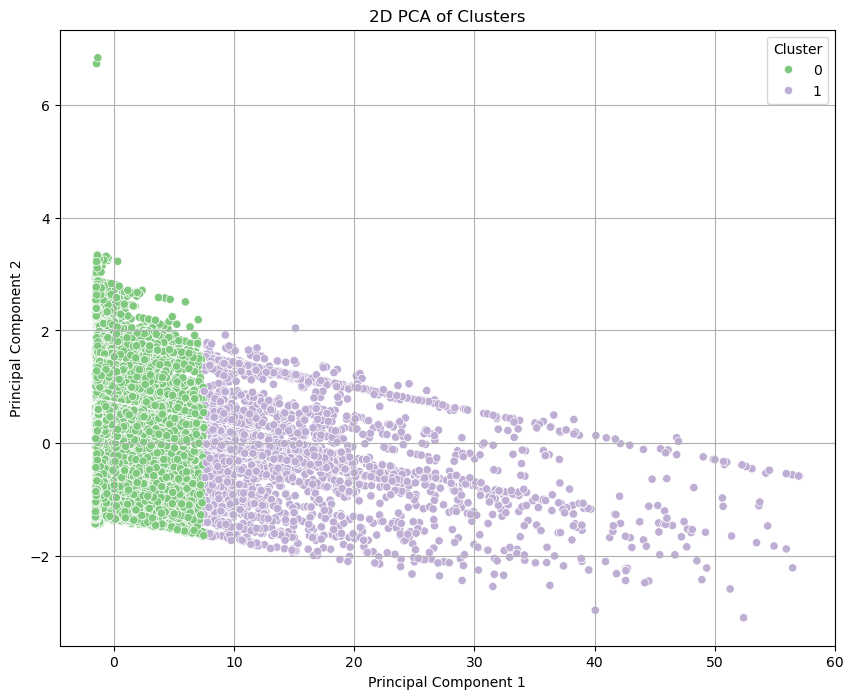

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_escalado) # Assuming X_escalado is your scaled data

# Create a new DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['Cluster'] = df['Cluster'].values

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=pca_df, palette="Accent", legend='full')
plt.title('2D PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig(figname)

plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Asumimos que X_escalado ya existe y tiene nombres de columnas (si no, usa X.columns)
# Ejemplo: si X_escalado es un array de numpy, necesitamos los nombres de las características originales.
# Si X es un DataFrame de Pandas:
# nombres_originales = X.columns
# Si X es un array de numpy con 5 columnas:
# nombres_originales = [f'feature_{i+1}' for i in range(X_escalado.shape[1])]

# IMPORTANTE: Asegúrate de reemplazar 'X.columns' si tus datos originales no son un DataFrame
try:
    nombres_originales = X.columns  # Intenta obtener nombres de un DataFrame
except AttributeError:
    # Si X es un array de numpy, usa la forma de abajo para obtener el número de columnas
    nombres_originales = [f'Variable_{i+1}' for i in range(X_escalado.shape[1])]


# 1. Ejecutar PCA con TODAS las componentes posibles
pca = PCA(n_components=None)
pca.fit(X_escalado)

# --- 1. RESUMEN DE VARIANZA (Igual que antes) ---

# Extraer la información clave
varianza_individual = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_individual)
nombres_componentes = [f'CP{i+1}' for i in range(len(varianza_individual))]

# Crear el DataFrame de resumen de varianza
df_pca_resumen = pd.DataFrame({
    'Componente Principal': nombres_componentes,
    'Varianza Explicada (%)': varianza_individual * 100,
    'Varianza Acumulada (%)': varianza_acumulada * 100
})

print("## 1. Resumen de la Varianza Explicada por Componente")
# Usamos to_string() para asegurar la impresión en consola
print(df_pca_resumen.head(10).style.format({
    'Varianza Explicada (%)': "{:.2f}%",
    'Varianza Acumulada (%)': "{:.2f}%"
}).to_string())

# ----------------------------------------------------
# --- 2. CARGAS (LOADINGS) DE LAS COMPONENTES ---

# La matriz de cargas (loadings) se encuentra en pca.components_
# Esto nos dice cómo se relaciona cada variable original con cada CP.
cargas_pca = pca.components_

# 4. Crear el DataFrame de cargas
# Las filas son las Componentes Principales (CP1, CP2, etc.)
# Las columnas son las Variables Originales
df_cargas = pd.DataFrame(
    cargas_pca.T,
    columns=nombres_componentes,
    index=nombres_originales
)

# 5. Mostrar la tabla de cargas (usamos las 3-5 primeras componentes para interpretación)
print("\n" + "="*50)
print("## 2. Contribución de Variables a las Componentes Principales (Loadings)")
print("Los valores cercanos a 1 o -1 indican una fuerte contribución.")

# Mostraremos solo las primeras 5 componentes para facilitar la lectura
df_cargas

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

# Perform PCA to reduce to 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_escalado) # Assuming X_escalado is your scaled data

# Create a new DataFrame with the 3D PCA results and cluster labels
pca_df_3d = pd.DataFrame(data = X_pca_3d, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df_3d['Cluster'] = df['Cluster'] # Assuming df has the 'Cluster' column

# Visualize the clusters in 3D using Plotly
fig = px.scatter_3d(pca_df_3d,
                    x='principal component 1',
                    y='principal component 2',
                    z='principal component 3',
                    color='Cluster',
                    title='3D PCA of Clusters')
fig.show()

In [ ]:
num=0;
if num==1:
    cluster_profile.to_excel('ResumenMayorA1.xlsx')
    df.to_excel('Clus4VentasMayorA1.xlsx')
elif num==2:
    cluster_profile.to_excel('ResumenMenorA1.xlsx')
    df.to_excel('Clus4VentasMenorA1.xlsx')

In [ ]:
df.head(3)